In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import pandas as pd
import numpy as np

In [2]:
# Download historical data for S&P 500 index
sp500 = yf.download('^GSPC', start='2010-01-01', end='2023-06-28')

[*********************100%***********************]  1 of 1 completed


In [3]:
# Check if there are any NaN values in the Close prices
print(f"NaN values in 'Close' prices: {sp500['Close'].isna().sum()}")

NaN values in 'Close' prices: 0


In [4]:
# Calculate the daily returns
sp500['return'] = sp500['Close'].pct_change()

In [5]:
# Drop NaN values
sp500 = sp500.dropna()

In [6]:
# Create a DataFrame for storing values
df = sp500.assign(
    month = sp500.index.month,
    day = sp500.index.day,
    positive = sp500['return'] > 0,
)

In [7]:
# Define month number (1 = January, 2 = February, ..., 12 = December)
month_number = 7

# Define a mapping from month numbers to month names
month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 
               7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

# Get the month name from the dictionary
month_name = month_names[month_number]

# Filter only for the desired month
df = df[df['month'] == month_number]

In [8]:
df = df.iloc[1:].dropna(subset=['return'])

# Create weekday groups
day_groups = df.groupby('day')

# List of days that exist in the dataset, sorted
existing_days = sorted(df['day'].unique())

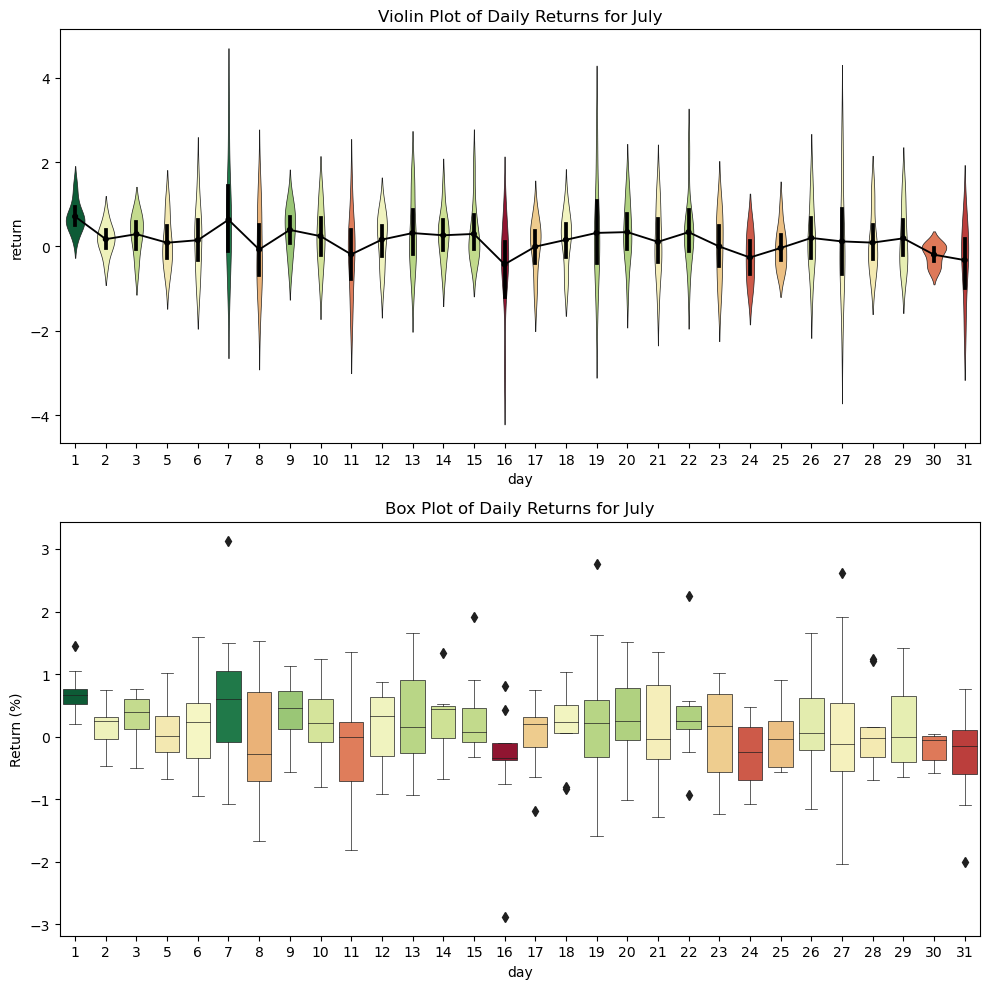

In [9]:
# Determine the colors for the violin plot and box plot based on mean return
mean_return = day_groups['return'].mean()
norm = plt.Normalize(mean_return.min(), mean_return.max())
sm = plt.cm.ScalarMappable(cmap="RdYlGn", norm=norm)
sm.set_array([])

# Create the first figure for violin and box plots
fig1, axs1 = plt.subplots(2, 1, figsize=(10, 10))

# Plot the violin plot for daily seasonality
sns.violinplot(x=df['day'], y=df['return']*100, ax=axs1[0], inner=None, palette=sm.to_rgba(mean_return.values), linewidth=0.5)
axs1[0].set_title(f'Violin Plot of Daily Returns for {month_name}')
axs1[0].set_ylabel('Return (%)')

# Add a line for the mean
sns.pointplot(x=df['day'], y=df['return']*100, ax=axs1[0], color='black', estimator=np.mean, linestyles='-', scale=0.5)

# Create a boxplot
sns.boxplot(x=df['day'], y=df['return']*100, ax=axs1[1], palette=sm.to_rgba(mean_return.values), linewidth=0.5)
axs1[1].set_title(f'Box Plot of Daily Returns for {month_name}')
axs1[1].set_ylabel('Return (%)')

plt.tight_layout()
plt.show()


In [11]:
# Calculate the mean returns and the proportion of positive return days for each day
average_returns = df.groupby('day')['return'].mean()
positive_days = df.groupby('day')['positive'].mean()

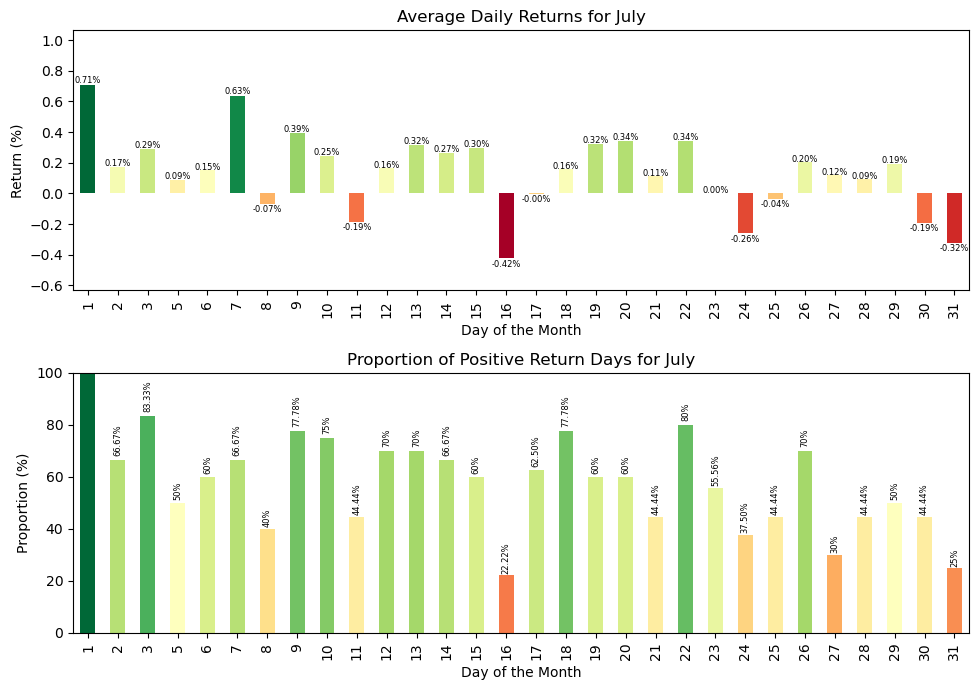

Mean values for 17th July:
Open         2.327036e+03
High         2.334576e+03
Low          2.316844e+03
Close        2.325897e+03
Adj Close    2.325897e+03
Volume       3.316069e+09
return      -3.824616e-05
month        7.000000e+00
day          1.700000e+01
positive     6.250000e-01
dtype: float64


In [23]:
# Create the figure for the bar plots
fig, axs = plt.subplots(2, 1, figsize=(10, 7))

# Create the bar plot for average returns
average_returns_percentage = average_returns * 100
average_returns_percentage.plot(kind='bar', color=sm.to_rgba(average_returns.values), ax=axs[0])
axs[0].set_title(f'Average Daily Returns for {month_name}')
axs[0].set_ylabel('Return (%)')
axs[0].set_xlabel('Day of the Month')
axs[0].set_ylim([average_returns_percentage.min()*1.5, average_returns_percentage.max()*1.5])  # Add more space for annotations

# Add annotations to the bars with reduced font size
for p in axs[0].patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    # Check if the value is positive or negative and adjust the position of the annotation accordingly
    if height >= 0:
        axs[0].annotate((f'{height:.0f}' if height.is_integer() else f'{height:.2f}') + '%', (x + width/2, y + height*1.02), ha='center', fontsize=6)
    else:
        axs[0].annotate((f'{height:.0f}' if height.is_integer() else f'{height:.2f}') + '%', (x + width/2, y + height*1.02 - 0.05), ha='center', fontsize=6)

# Create a color map for the proportion of positive return days
norm_positive_days = plt.Normalize(0, 1)  # Normalize between 0 and 1
colors_positive_days = plt.cm.RdYlGn(norm_positive_days(positive_days.values))  # Get the colors

# Create the bar plot for positive return days with updated colors
positive_days_percentage = positive_days * 100
positive_days_percentage.plot(kind='bar', color=colors_positive_days, ax=axs[1])
axs[1].set_title(f'Proportion of Positive Return Days for {month_name}')
axs[1].set_ylabel('Proportion (%)')
axs[1].set_xlabel('Day of the Month')
axs[1].set_ylim([0, 100])  # Add more space for annotations

# Add annotations to the bars with reduced font size and vertical orientation
for p in axs[1].patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    axs[1].annotate((f'{height:.0f}' if height.is_integer() else f'{height:.2f}') + '%', (x + width/2, y + height*1.02), ha='center', va='bottom', fontsize=6, rotation=90)

plt.tight_layout()
plt.show()

print("Mean values for 17th July:")
print(df[df['day'] == 17].mean())
